In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# X and y

In [4]:
input_data=df.drop('class',axis=1)
X=pd.get_dummies(input_data,drop_first=True)

In [5]:
y=pd.get_dummies(df['class'],drop_first=True)

# Train Test Split


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# XGBoost Classifier Model with default parameters

In [7]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Identifying best parameters for XGBoost model using hyperparameter tuning 

In [8]:
ypred_train=xgb_model.predict(X_train)
ypred_test=xgb_model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,ypred_train))
print(accuracy_score(y_test,ypred_test))

1.0
1.0


In [10]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=xgb_model, X=X, y=y, cv=5)
accuracies.mean()

0.9330246305418719

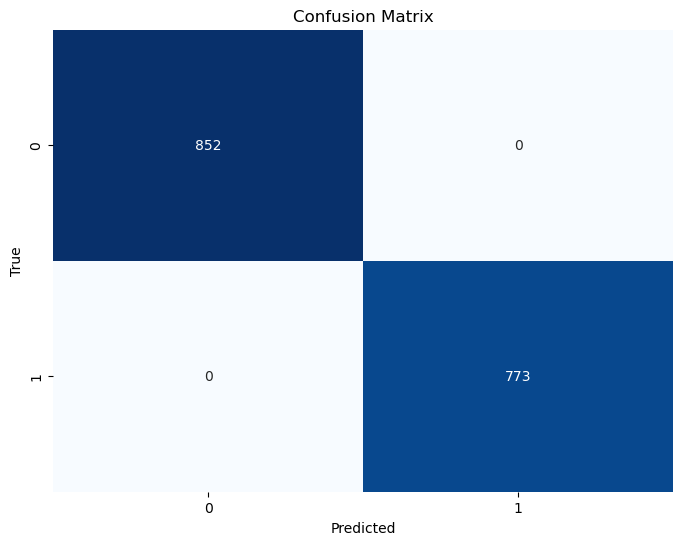

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



# Hyper-parameter tuning 

In [13]:
from sklearn.model_selection import GridSearchCV

estimator=XGBClassifier()

param_grid={'n_estimators': [10,20,40,100],
           'max_depth': [3,4,5],
           'gamma': [0,0.15,0.3,0.5,1]}

grid=GridSearchCV(xgb_model,param_grid,cv=5,scoring='accuracy')

grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.15, 0.3, 0.5, 1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [10, 20, 40, 100]},
             scoring='accuracy')

In [14]:
grid.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 40}

# Features Importance

In [15]:
grid.best_estimator_.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.39699351e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.30725941e-04,
       4.16309247e-03, 5.36190532e-02, 2.00757058e-03, 2.37451345e-02,
       1.27453834e-01, 7.34612951e-03, 2.31251538e-01, 1.43311378e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.51813298e-03,
       1.82889253e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.07867561e-04, 7.36224523e-04, 1.98680341e-01, 0.00000000e+00,
       2.36297369e-01, 1.22157775e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.23025689e-04, 2.07630154e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [16]:
feat_imp=pd.DataFrame(index=X.columns,
                     data=grid.best_estimator_.feature_importances_,
                     columns=['Importance'])
feat_imp

,Importance
cap-shape_c,0.00000
cap-shape_f,0.00000
cap-shape_k,0.00000
cap-shape_s,0.00000
cap-shape_x,0.00000
...,...
habitat_l,0.00063
habitat_m,0.00000
habitat_p,0.00000
habitat_u,0.00000


In [17]:
imp_feats=feat_imp[feat_imp['Importance']>0.01]

In [18]:
X_imp=X[imp_feats]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

xgb_bhp=XGBClassifier(gamma=0,max_depth=3,n_estimators=40)
xgb_bhp.fit(X_train,y_train)

ypred_train=xgb_bhp.predict(X_train)
predictions=xgb_bhp.predict(X_test)

from sklearn.metrics import accuracy_score
print('Train_accuracy:',accuracy_score(y_train,ypred_train))
print('Test_accuracy:',accuracy_score(y_test,predictions))

scores=cross_val_score(xgb_bhp,X,y,cv=5)
print('Cross Validation Score: ',scores.mean())

Train_accuracy: 1.0
Test_accuracy: 1.0
Cross Validation Score:  0.8964485032209171


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[852,   0],
       [  0, 773]])

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



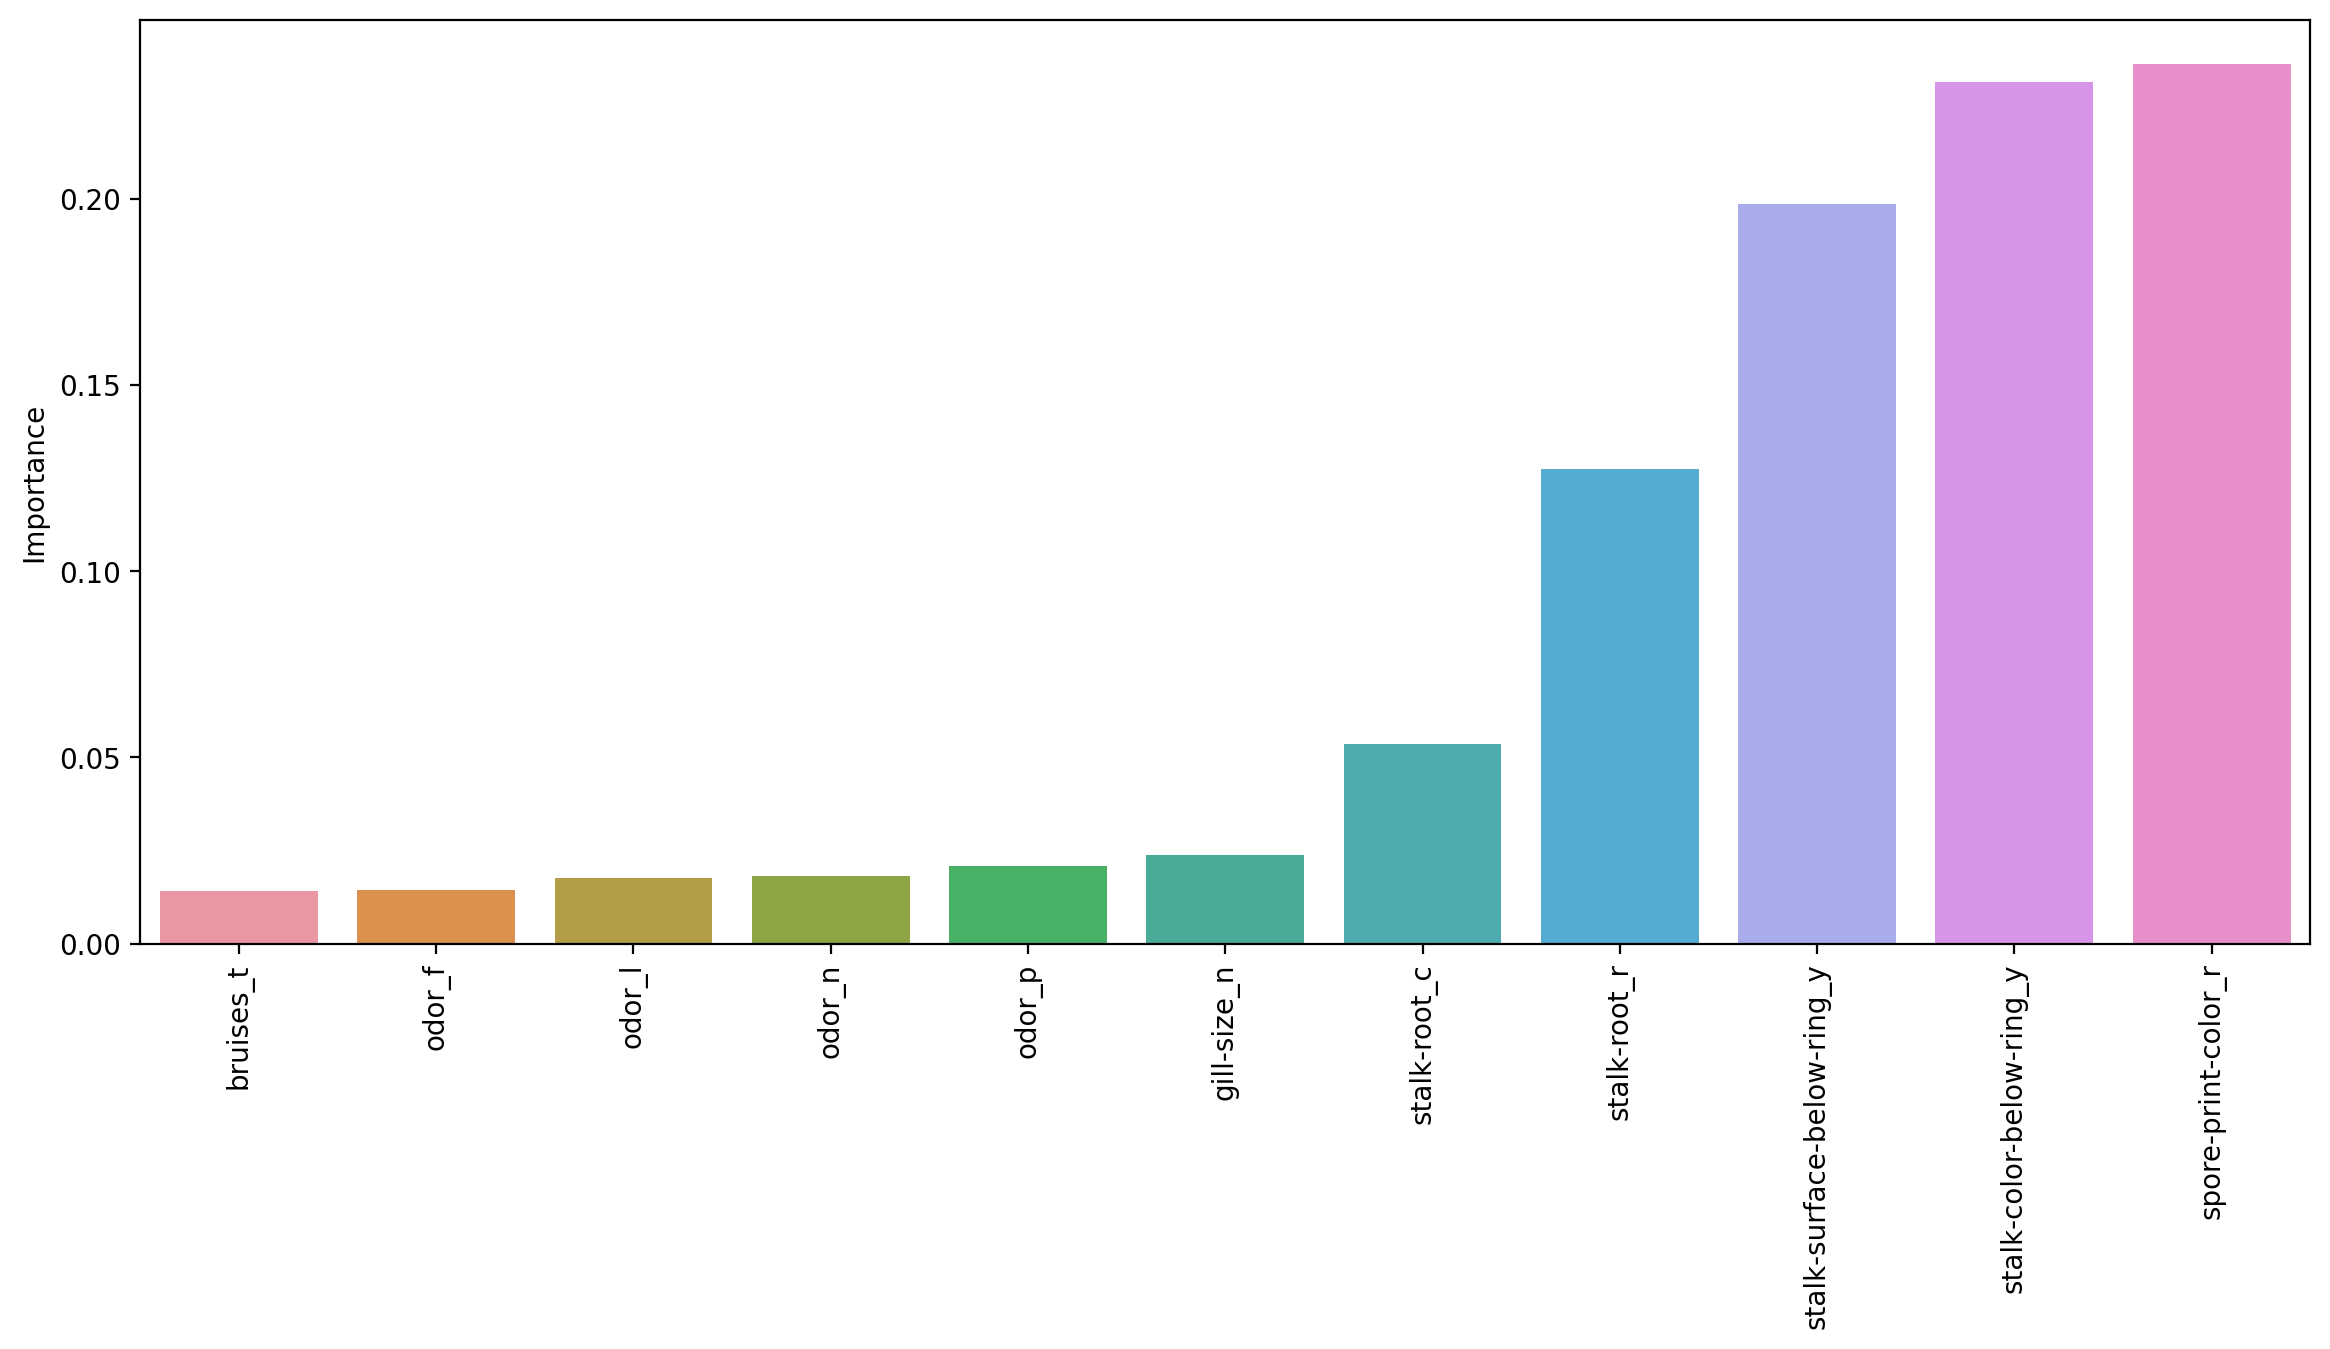

In [21]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90)
plt.show()